In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gdown

In [ ]:
file_id = '1KRJfjxfqr_PQd1PTZd_-pxKptfIGJk_T'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'car.csv'
gdown.download(url, output, quiet=True)

'car.csv'

In [ ]:
car = pd.read_csv(output)
print(car.head())

           id                                                url  \
0  7222695916  https://prescott.craigslist.org/cto/d/prescott...   
1  7218891961  https://fayar.craigslist.org/ctd/d/bentonville...   
2  7221797935  https://keys.craigslist.org/cto/d/summerland-k...   
3  7222270760  https://worcester.craigslist.org/cto/d/west-br...   
4  7210384030  https://greensboro.craigslist.org/cto/d/trinit...   

                   region                         region_url  price  year  \
0                prescott    https://prescott.craigslist.org   6000   NaN   
1            fayetteville       https://fayar.craigslist.org  11900   NaN   
2            florida keys        https://keys.craigslist.org  21000   NaN   
3  worcester / central MA   https://worcester.craigslist.org   1500   NaN   
4              greensboro  https://greensboro.craigslist.org   4900   NaN   

  manufacturer model condition cylinders  ... size  type paint_color  \
0          NaN   NaN       NaN       NaN  ...  NaN   NaN

In [ ]:
car_copy = car.copy()

# **Tổng quan dữ liệu**

| # | Thuộc tính| Mô tả |
|-----|----------------|-----------------------------------------------------------------------------|
| 0  | `id`  | Mã định danh duy nhất cho mỗi tin đăng |
| 1  | `url` | Đường dẫn URL đến tin đăng gốc trên Craigslist |
| 2  | `region` | Khu vực trên Craigslist nơi xe được đăng bán |
| 3  | `region_url` | Đường dẫn URL đến khu vực cụ thể trên Craigslist |
| 4  | `price` | Giá bán yêu cầu của xe tính bằng USD |
| 5  | `year`  | Năm sản xuất của xe |
| 6  | `manufacturer` | Thương hiệu hoặc nhà sản xuất xe |
| 7  | `model` | Dòng xe (model) cụ thể |
| 8  | `condition`| Tình trạng xe (ví dụ: xuất sắc, tốt, khá) |
| 9  | `cylinders` | Số lượng xi-lanh trong động cơ xe  |
| 10 | `fuel`| Loại nhiên liệu xe sử dụng (ví dụ: xăng, dầu diesel, điện) |
| 11 | `odometer`  | Số dặm xe đã đi (số công-tơ-mét/quãng đường đã di chuyển) |
| 12 | `title_status` | Tình trạng pháp lý của giấy tờ xe (ví dụ: giấy tờ sạch, xe phục hồi) |
| 13| `transmission` | Loại hộp số (ví dụ: tự động, số sàn) |
| 14 | `VIN` | Số nhận dạng xe (Số VIN) |
| 15 | `drive` | Hệ dẫn động (ví dụ: cầu trước fwd, cầu sau rwd, 2 cầu 4wd)|
| 16 | `size`  | Phân loại kích thước xe (ví dụ: cỡ lớn, cỡ nhỏ) |
| 17 | `type`  | Kiểu dáng thân xe (ví dụ: sedan, SUV, bán tải) |
| 18 | `paint_color` | Màu sơn ngoại thất của xe |
| 19 | `image_url`   | Đường dẫn URL đến hình ảnh chính của tin đăng  |
| 20 | `description` | Toàn bộ văn bản mô tả do người bán cung cấp |
| 21 | `county`  | Quận/Huyện nơi xe được đăng bán  |
| 22 | `state` | Tên viết tắt tiểu bang (Mỹ) nơi xe được đăng bán (ví dụ: ca, ny) |
| 23 | `lat` | Tọa độ vĩ độ của địa điểm  |
| 24 | `long`| Tọa độ kinh độ của địa điểm |
| 25 | `posting_date` | Ngày và giờ khi tin đăng được tạo  |

## Kiểm tra kiểu dữ liệu

In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

## Kiểm tra dữ liệu thiếu

In [ ]:
# Sắp xếp tỷ lệ dữ liệu thiếu giảm dần
print(round(car.isnull().sum().sort_values(ascending=False)/len(car)*100,2))

county          100.00
size             71.77
cylinders        41.62
condition        40.79
VIN              37.73
drive            30.59
paint_color      30.50
type             21.75
manufacturer      4.13
title_status      1.93
lat               1.53
long              1.53
model             1.24
odometer          1.03
fuel              0.71
transmission      0.60
year              0.28
description       0.02
posting_date      0.02
image_url         0.02
region_url        0.00
url               0.00
id                0.00
region            0.00
price             0.00
state             0.00
dtype: float64


## Kiểm tra dữ liệu trùng lặp

In [ ]:
car.nunique()

,0
id,426880
url,426880
region,404
region_url,413
price,15655
year,114
manufacturer,42
model,29667
condition,6
cylinders,8


In [ ]:
car.duplicated().sum()

np.int64(0)

## **Nhận xét**

**Loại bỏ các cột sau**:
*   `id`, `url`, `region_url`, `image_url`: không giúp ích cho mô hình.
*   `county`, `size`, `cylinders` và `condition`: tỷ lệ dữ liệu thiếu quá nhiều (> 40%), nếu sử dụng điền khuyết không cẩn thận sẽ dẫn đến sai lệch mô hình.
*   `region`: sử dụng `state`, `lat` và `long` vì `region` là khu vực theo Craigslist nên không bao quán như `state` cũng không chi tiết như `lat` và `long`.
*   `VIN` và `description`: cần xử lý chuỗi phức tạp để rút ra một số thông tin về xe, loại bỏ để đơn giản hoá.





In [ ]:
car_copy.drop(columns=['id','url','region_url','image_url','county','size','cylinders','region','VIN','description'],inplace=True)

# **Thuộc tính số**

In [ ]:
numerical_data = car_copy.select_dtypes(include='number')
numerical_features=numerical_data.columns.tolist()

print(f'There are {len(numerical_features)} numerical features:', '\n')
print(numerical_features)

There are 7 numerical features: 

['id', 'price', 'year', 'odometer', 'county', 'lat', 'long']


In [ ]:
numerical_data.describe()

,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


## Thuộc tính đích `price`

In [ ]:
print(car_copy['price'].describe())

count    4.268800e+05
mean     7.519903e+04
std      1.218228e+07
min      0.000000e+00
25%      5.900000e+03
50%      1.395000e+04
75%      2.648575e+04
max      3.736929e+09
Name: price, dtype: float64


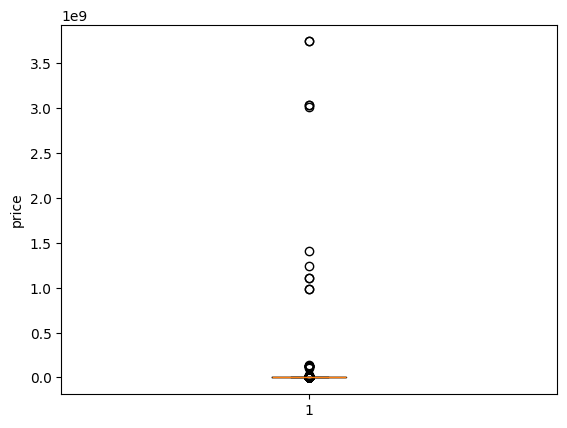

In [ ]:
plt.boxplot(car_copy['price'].dropna())
plt.ylabel('price')
plt.show()

Thuộc tính có nhiều giá trị ngoại lai, nhưng không thể áp dụng các phép bỏ giá trị ngoại lai thông thường như IQR hay Z-Score vì sẽ làm sai lệch mô hình. Do đó, loại bỏ các giá trị `price` quá cao và quá thấp dựa vào thực tế. Chọn bỏ giá trị `price` nhỏ hơn 100 hoặc lớn hơn 100000.

Vì phải tạo cột mới và không sử dụng trực tiếp cột `year` nên xử lý cột `posting_date` trước.

## `posting_date`

In [ ]:
car_copy['posting_date'].isna().sum()

np.int64(62)

In [ ]:
car_copy['posting_date']

,posting_date
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
426875,2021-04-04T03:21:31-0600
426876,2021-04-04T03:21:29-0600
426877,2021-04-04T03:21:17-0600
426878,2021-04-04T03:21:11-0600




*   Tỷ lệ dữ liệu thiếu ít nên xoá những dòng có giá trị thiếu.
*   Chuyển dữ liệu sang kiểu ngày tháng bằng `pd.to_datetime` với `utc=True`.
*   Tách dữ liệu năm để tính toán cột `age` với cột `year` bằng `dt.year`.



## `year`

In [ ]:
car['year'].describe()

,year
count,425675.000000
mean,2011.235191
std,9.452120
min,1900.000000
25%,2008.000000
50%,2013.000000
75%,2017.000000
max,2022.000000


Cột năm phải chính xác tương ứng với hãng xe và mẫu xe, nên không thể dùng điền khuyết thông thường. Ngoài ra, số lượng thiếu ít, nên bỏ những dòng có dữ liệu thiếu. Loại bỏ những năm nhỏ hơn 1981 vì đây là những xe cổ, không thể dùng các mô hình tuyến tính để dự đoán giá, và những năm lớn hơn năm của `posting_date` là 2021.

## Tạo cột mới `age`:

`car_copy['age'] = car_copy['posting_year'] - car_copy['year']`

## `odometer`

In [ ]:
car['odometer'].isna().sum()

np.int64(4400)

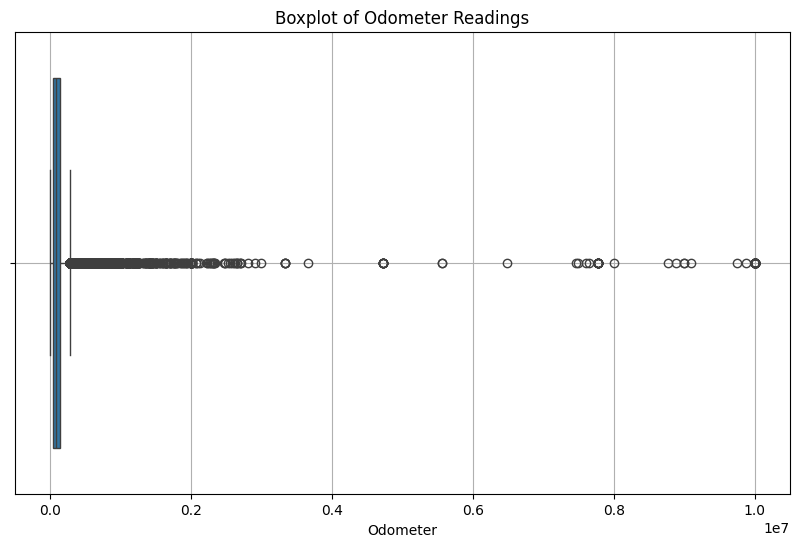

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=car_copy['odometer'].dropna())
plt.title('Boxplot of Odometer Readings')
plt.xlabel('Odometer')
plt.grid(True)
plt.show()

In [ ]:
print(car_copy['odometer'].describe())

count    3.803060e+05
mean     9.748621e+04
std      1.534410e+05
min      0.000000e+00
25%      3.920200e+04
50%      8.875600e+04
75%      1.368748e+05
max      1.000000e+07
Name: odometer, dtype: float64


Cột này cũng có nhiều giá trị ngoại lai, nhưng cũng không thể áp dụng các phương pháp loại bỏ thông thường mà phải loại bỏ giá trị không hợp lệ (lớn hơn 500000).

# **Thuộc tính phân loại**

In [ ]:
categorical_data = car_copy.select_dtypes(include='object')
categorical_features=categorical_data.columns.tolist()

print(f'There are {len(categorical_features)} categorical features:', '\n')
print(categorical_features)

There are 12 categorical features: 

['region', 'manufacturer', 'model', 'condition', 'fuel', 'title_status', 'transmission', 'drive', 'type', 'paint_color', 'state', 'posting_date']


In [ ]:
print(categorical_data.nunique(dropna=False))

region             404
manufacturer        43
model            29668
condition            7
fuel                 6
title_status         7
transmission         4
drive                4
type                14
paint_color         13
state               51
posting_date    381537
dtype: int64


In [ ]:
print(round(car_copy[categorical_features].isnull().sum().sort_values(ascending=False)/len(car_copy)*100,2))

condition       40.79
drive           30.59
paint_color     30.50
type            21.75
manufacturer     4.13
title_status     1.93
model            1.24
fuel             0.71
transmission     0.60
posting_date     0.02
region           0.00
state            0.00
dtype: float64




*   Thay thế giá trị thiếu của các cột có tỷ lệ thiếu đáng kể (>4%) bằng `unknown`, tỷ lệ thiếu nhỏ bằng trung vị.
*   Mã hoá các cột có giá trị duy nhất lớn (>10) bằng Target Encoder, còn lại mã hoá bằng One Hot Encoder.

